### Valorile totale din 1990 - 2019

diferenta dintre ultimul an si primul an in mii de hectare: 221.19999999999982


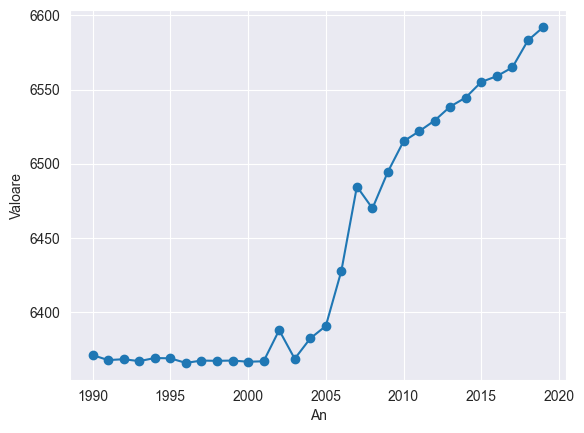

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
modified_dataset = pd.read_csv('modified_dataset.csv')

# Filter the data for Category = 'Total' and Region = 'TOTAL'
filtered_data = modified_dataset[(modified_dataset['Category'] == 'Total') & (modified_dataset['Region'] == 'TOTAL')]

# Group the filtered data by Year and calculate the sum of values for each year
grouped_data = filtered_data.groupby('Year')['Value'].sum()

# Calculate the difference between the first and last year
first_year_value = grouped_data.iloc[0]
last_year_value = grouped_data.iloc[-1]
difference = last_year_value - first_year_value

print(f'diferenta dintre ultimul an si primul an in mii de hectare: {difference}')


# Plot the data
plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-')
plt.xlabel('An')
plt.ylabel('Valoare')
plt.grid(True)
plt.show()



Statistici descriptive pentru suprafețele forestiere:
count    1639.000000
mean      471.803783
std       944.932842
min         0.600000
25%        81.700000
50%       191.800000
75%       390.550000
max      6592.200000
Name: Value, dtype: float64


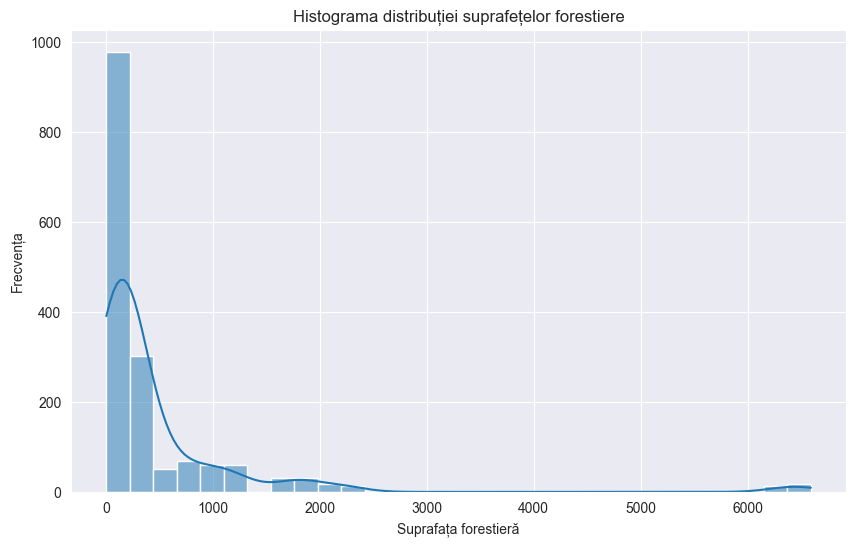

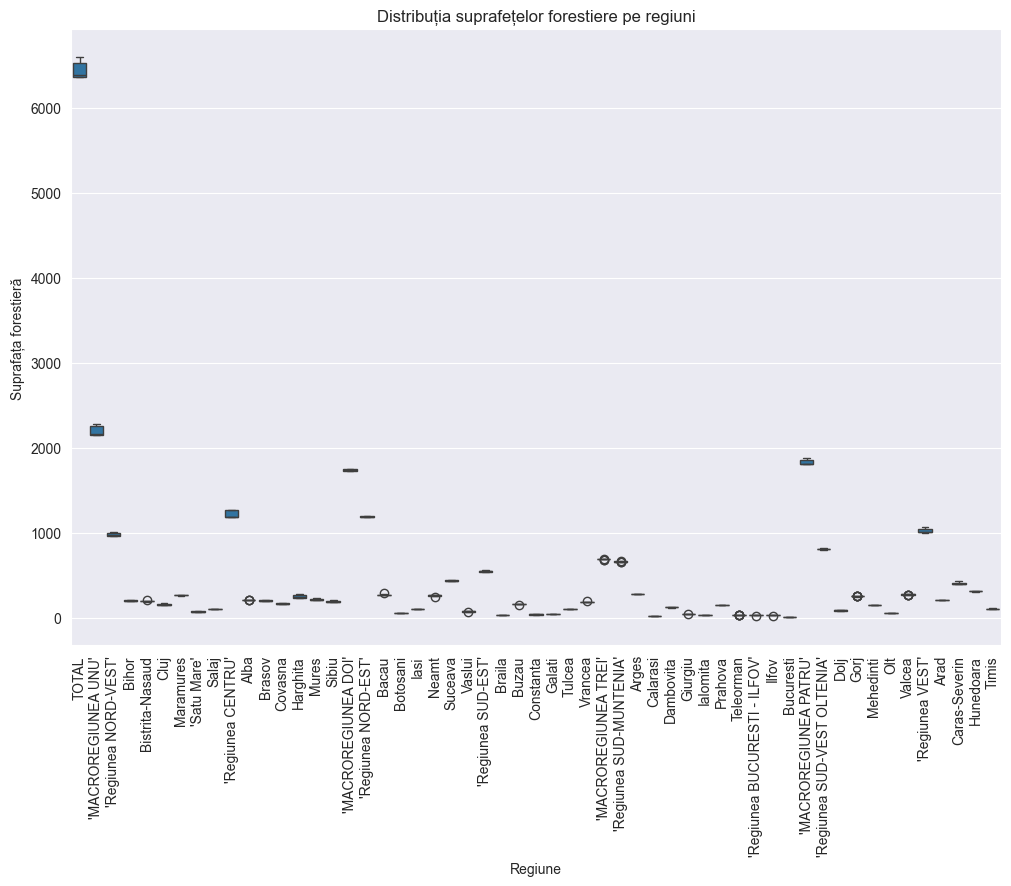

C:\Users\User\AppData\Local\Temp\ipykernel_3632\3959210278.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Value', data=filtered_data, ci=None)


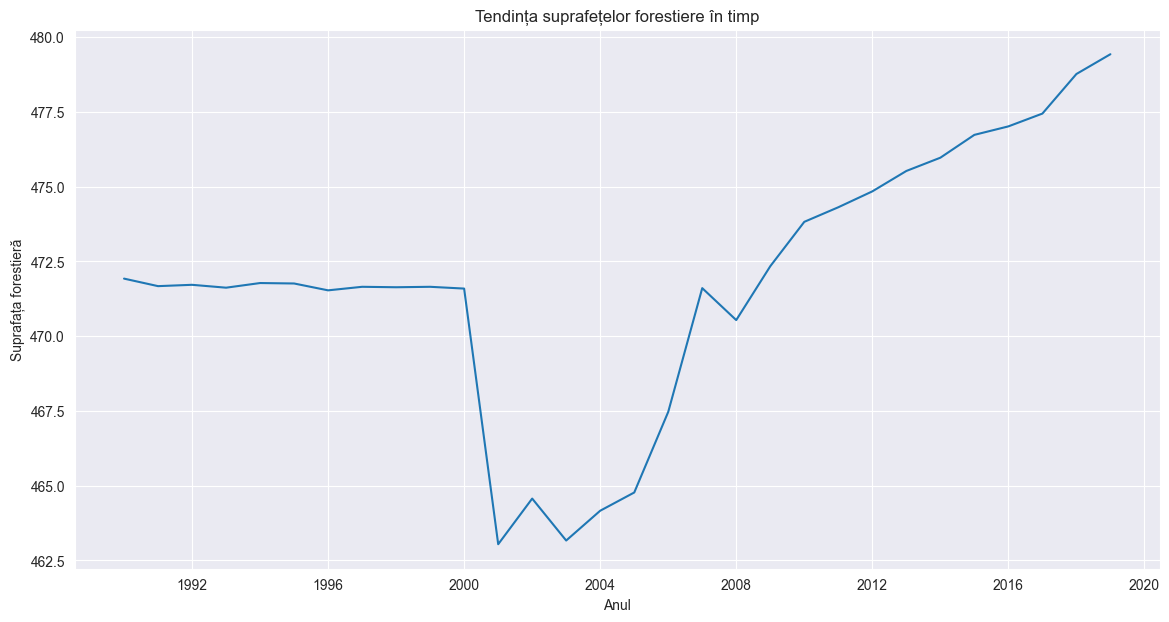

C:\Users\User\AppData\Local\Temp\ipykernel_3632\3959210278.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Region_encoded'] = label_encoder.fit_transform(filtered_data['Region'])


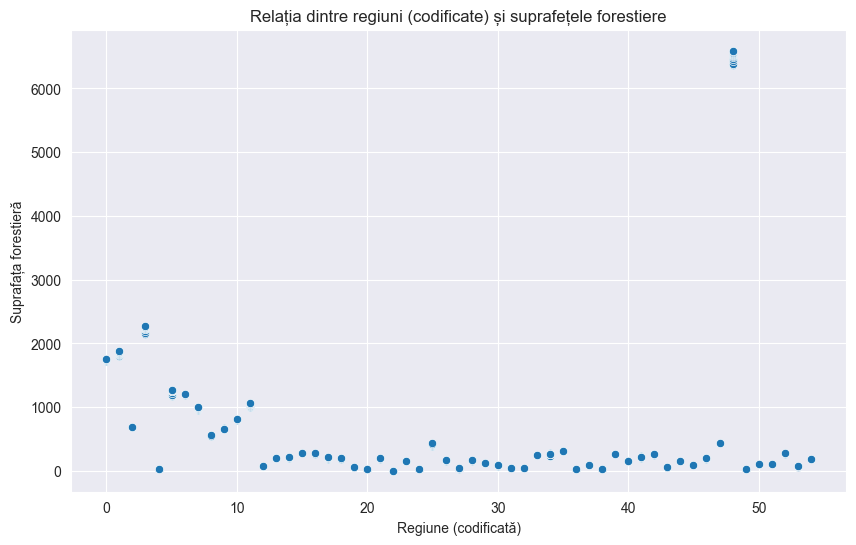

Corelația între 'Region' și 'Value': -0.14295394457638616


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('modified_dataset.csv')

# Ensure 'Year' is a datetime object
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Filter the data for 'Total' category
filtered_data = df[df['Category'] == 'Total']

# Statistici descriptive
descriptive_stats = filtered_data['Value'].describe()
print("Statistici descriptive pentru suprafețele forestiere:")
print(descriptive_stats)

# Histograma distribuției suprafețelor forestiere
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Value'], bins=30, kde=True)
plt.title('Histograma distribuției suprafețelor forestiere')
plt.xlabel('Suprafața forestieră')
plt.ylabel('Frecvența')
plt.show()

# Box plot pentru suprafețele forestiere pe regiuni
plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='Value', data=filtered_data)
plt.xticks(rotation=90)
plt.title('Distribuția suprafețelor forestiere pe regiuni')
plt.xlabel('Regiune')
plt.ylabel('Suprafața forestieră')
plt.show()

# Time series plot pentru suprafețele forestiere în timp
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Value', data=filtered_data, ci=None)
plt.title('Tendința suprafețelor forestiere în timp')
plt.xlabel('Anul')
plt.ylabel('Suprafața forestieră')
plt.show()

# Scatter plot pentru relația dintre regiuni (codificate) și suprafețele forestiere
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
filtered_data['Region_encoded'] = label_encoder.fit_transform(filtered_data['Region'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Region_encoded', y='Value', data=filtered_data)
plt.title('Relația dintre regiuni (codificate) și suprafețele forestiere')
plt.xlabel('Regiune (codificată)')
plt.ylabel('Suprafața forestieră')
plt.show()

# Calculul corelației între 'Region_encoded' și 'Value'
correlation_value = filtered_data[['Region_encoded', 'Value']].corr().loc['Region_encoded', 'Value']
print(f"Corelația între 'Region' și 'Value': {correlation_value}")


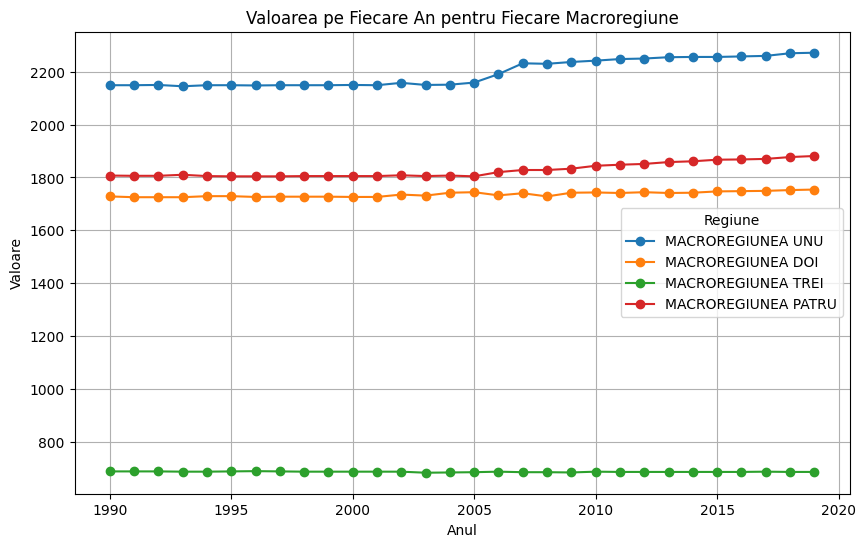

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
Macroregiuni = pd.read_csv('Macroregiuni.csv')

# Ensure 'Category' is 'Total'
filtered_data = Macroregiuni[Macroregiuni['Category'] == 'Total']

# List of regions
regions = ['MACROREGIUNEA UNU', 'MACROREGIUNEA DOI', 'MACROREGIUNEA TREI', 'MACROREGIUNEA PATRU']

# Plotting
plt.figure(figsize=(10, 6))

# Loop through each region and plot the data
for region in regions:
    region_data = filtered_data[filtered_data['Region'] == region]
    grouped_data = region_data.groupby('Year')['Value'].sum()
    plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-', label=region)

# Adding labels and title
plt.xlabel('Anul')
plt.ylabel('Valoare')
plt.title('Valoarea pe Fiecare An pentru Fiecare Macroregiune')
plt.legend(title='Regiune')
plt.grid(True)
plt.show()


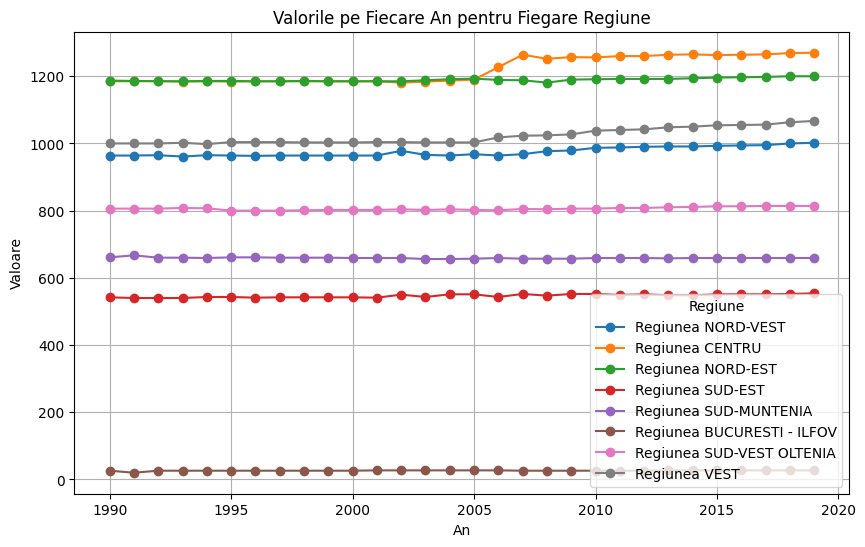

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
Judete = pd.read_csv('Regiuni.csv')

# List of unique regions in the dataset
regions = Judete['Region'].unique()

# Plotting
plt.figure(figsize=(10, 6))

# Loop through each region and plot the data
for region in regions:
    region_data = Judete[Judete['Region'] == region]
    grouped_data = region_data.groupby('Year')['Value'].sum()
    plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-', label=region)

# Adding labels and title
plt.xlabel('An')
plt.ylabel('Valoare')
plt.title('Valorile pe Fiecare An pentru Fiegare Regiune')
plt.legend(title='Regiune')
plt.grid(True)
plt.show()


### Cea mai mare diferenta de valoare din toate judetele

In [18]:
import pandas as pd

# Load the dataset
Judete = pd.read_csv('Judete.csv')

# Ensure 'Category' is 'Total'
filtered_data = Judete[Judete['Category'] == 'Total']

# Group the data by 'Region' and calculate the difference between 2019 and 1990
grouped_data = filtered_data.groupby('Region').agg({'Value': lambda x: x.iloc[-1] - x.iloc[0]})

# Sort the regions based on the calculated differences
sorted_regions = grouped_data.sort_values(by='Value', ascending=False)

# Select the top 5 regions with the largest differences
top_5_regions = sorted_regions.head(5)

# Display the top 5 regions with the largest differences
print("Top 5 regions with the largest difference between 2019 and 1990:")
print(top_5_regions)


Top 5 regions with the largest difference between 2019 and 1990:
               Value
Region              
Caras-Severin     40
Harghita          33
Cluj              17
Sibiu             16
Bihor             16


In [4]:
import pandas as pd

# Load the dataset
Judete = pd.read_csv('Judete.csv')

# Ensure 'Category' is 'Total'
filtered_data = Judete[Judete['Category'] == 'Total']

# Group the data by 'Region' and calculate the difference between 2019 and 1990
grouped_data = filtered_data.groupby('Region').agg({'Value': lambda x: x.iloc[0] - x.iloc[-1]})

# Sort the regions based on the calculated differences
sorted_regions = grouped_data.sort_values(by='Value', ascending=False)

# Select the top 5 regions with the largest differences
top_5_regions = sorted_regions.head(5)

# Display the top 5 regions with the largest differences
print("Top 5 regiuni cu gea mai mare diferenta negativa din 1990 pana in 2019:")
print(top_5_regions)

Top 5 regiuni cu gea mai mare diferenta negativa din 1990 pana in 2019:
           Value
Region          
Gorj           4
Prahova        3
Maramures      2
Arges          1
Giurgiu        1


### Corelatia dintre coloanele din tabela Judete

  Category Region  Year  Value
0    Total  Bihor  1990    195
1    Total  Bihor  1991    195
2    Total  Bihor  1992    195
3    Total  Bihor  1993    192
4    Total  Bihor  1994    195
             Region       Value
0              Alba  206.366667
1              Arad  206.366667
2             Arges  277.933333
3             Bacau  269.266667
4             Bihor  201.333333
5   Bistrita-Nasaud  191.400000
6          Botosani   56.200000
7            Braila   26.466667
8            Brasov  196.566667
9         Bucuresti    1.000000
10            Buzau  158.766667
11         Calarasi   21.466667
12    Caras-Severin  401.166667
13             Cluj  155.733333
14        Constanta   37.566667
15          Covasna  165.433333
16        Dambovita  118.766667
17             Dolj   85.300000
18           Galati   36.700000
19          Giurgiu   38.766667
20             Gorj  249.566667
21         Harghita  246.833333
22        Hunedoara  311.000000
23         Ialomita   26.000000
24            

C:\Users\User\AppData\Local\Temp\ipykernel_10268\731898603.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Value', data=region_means, palette='coolwarm')


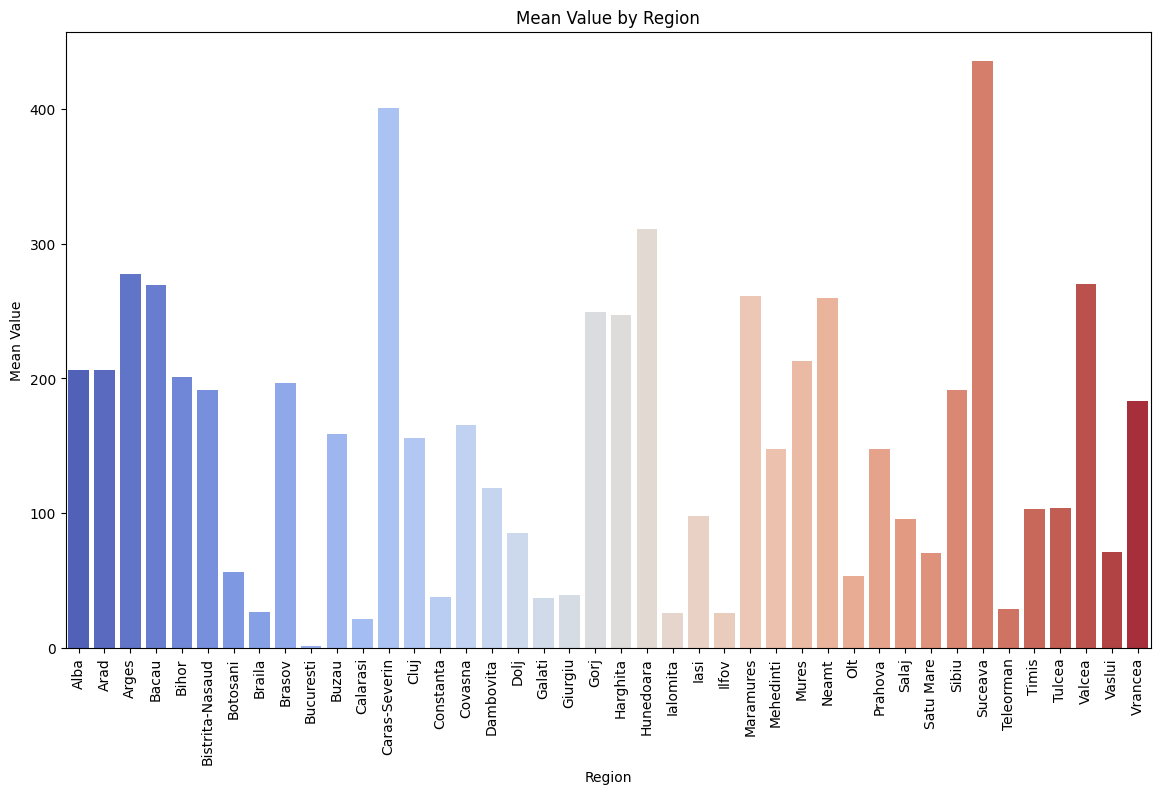

ANOVA result: F-statistic=16667.56316773844, p-value=0.0


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
Judete = pd.read_csv('Judete.csv')

# Display the first few rows of the dataframe to understand its structure
print(Judete.head())

# Ensure 'Year' is a datetime object
Judete['Year'] = pd.to_datetime(Judete['Year'], format='%Y')

# Calculate the mean 'Value' for each 'Region'
region_means = Judete.groupby('Region')['Value'].mean().reset_index()

# Display the means
print(region_means)

# Plot the means
plt.figure(figsize=(14, 8))
sns.barplot(x='Region', y='Value', data=region_means, palette='coolwarm')
plt.xlabel('Region')
plt.ylabel('Mean Value')
plt.title('Mean Value by Region')
plt.xticks(rotation=90)
plt.show()

# Perform ANOVA test
anova_result = stats.f_oneway(*(Judete[Judete['Region'] == region]['Value'] for region in Judete['Region'].unique()))
print(f"ANOVA result: F-statistic={anova_result.statistic}, p-value={anova_result.pvalue}")


### ARIMA algorithm pentru toate regiuniile

D:\machine_learning\Forest-Surfaces-in-Romania-1990-2019\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\machine_learning\Forest-Surfaces-in-Romania-1990-2019\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Temp\ipykernel_10268\3534024513.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  difference = forecast_values[-1] - historical_value_2019


Diferenta dintre Anul 2019 si Anul 2030: 60.05030674905447


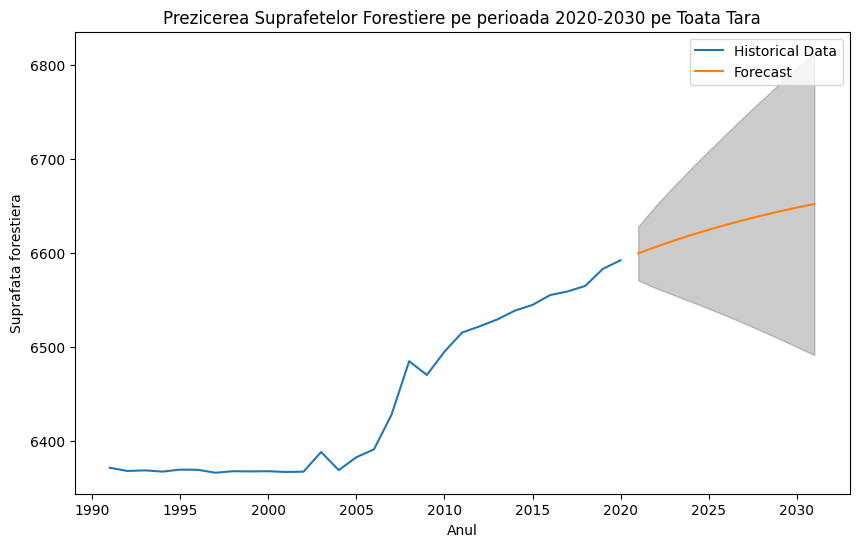

In [10]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset
Judete = pd.read_csv('modified_dataset.csv')

# Ensure 'Year' is a datetime object and set as index
Judete['Year'] = pd.to_datetime(Judete['Year'], format='%Y')

# Filter the data for 'TOTAL' region and 'Total' category
filtered_data = Judete[(Judete['Region'] == 'TOTAL') & (Judete['Category'] == 'Total')]

# Set 'Year' as the index
filtered_data.set_index('Year', inplace=True)

# Resample the data to ensure yearly data
filtered_data = filtered_data.resample('YE').sum()

# Fit ARIMA model
model = ARIMA(filtered_data['Value'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast from 2020 to 2030
forecast = model_fit.get_forecast(steps=11)
forecast_index = pd.date_range(start='2020-12-31', end='2030-12-31', freq='YE')
forecast_values = forecast.predicted_mean
forecast_conf = forecast.conf_int()

# Calculate the difference between the forecasted value for 2030 and the historical value for 1990
try:
    historical_value_2019 = filtered_data.loc['2019-12-31']['Value']
    difference = forecast_values[-1] - historical_value_2019
    print(f"Diferenta dintre Anul 2019 si Anul 2030: {difference}")
except KeyError:
    print("eroare.")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['Value'], label='Historical Data')
plt.plot(forecast_index, forecast_values, label='Forecast')
plt.fill_between(forecast_index, forecast_conf.iloc[:, 0], forecast_conf.iloc[:, 1], color='k', alpha=0.2)
plt.xlabel('Anul')
plt.ylabel('Suprafata forestiera')
plt.title('Prezicerea Suprafetelor Forestiere pe perioada 2020-2030 pe Toata Tara')
plt.legend()
plt.show()


### Regresie liniara

Difference between 2019 and 2030: 71.85951798294354
Mean Squared Error: 942.0633870720816
Mean Absolute Error: 25.79636336670416


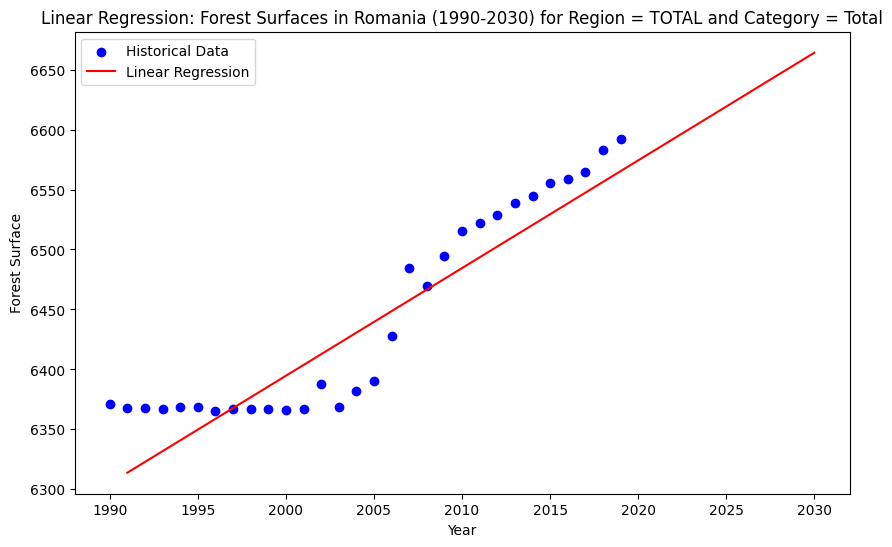

In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
Judete = pd.read_csv('modified_dataset.csv')

# Ensure 'Year' is a datetime object
Judete['Year'] = pd.to_datetime(Judete['Year'], format='%Y')

# Filter the data for 'TOTAL' region and 'Total' category
filtered_data = Judete[(Judete['Region'] == 'TOTAL') & (Judete['Category'] == 'Total')]

# Aggregate data by year
filtered_data = filtered_data.groupby('Year')['Value'].sum().reset_index()

# Extracting year values as integers
X = filtered_data['Year'].dt.year.values.reshape(-1, 1)

# Extracting forest surface values
y = filtered_data['Value']

# Initialize and fit Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict forest surface for years from 1990 to 2030
years = pd.Series(pd.date_range(start='1990', end='2030', freq='YE'))
X_pred = years.dt.year.values.reshape(-1, 1)
y_pred = model.predict(X_pred)

# Calculate the difference between the forecasted value for 2030 and the historical value for 2019
try:
    historical_value_2019 = filtered_data.loc[filtered_data['Year'].dt.year == 2019, 'Value'].iloc[0]
    difference = y_pred[-1] - historical_value_2019
    print(f"Difference between 2019 and 2030: {difference}")
except IndexError:
    print("Data for 2019 is not available.")

# Calculate MSE and MAE
y_true_train = y
y_pred_train = model.predict(X)

mse = mean_squared_error(y_true_train, y_pred_train)
mae = mean_absolute_error(y_true_train, y_pred_train)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Year'], filtered_data['Value'], color='blue', label='Historical Data')
plt.plot(years, y_pred, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Forest Surface')
plt.title('Linear Regression: Forest Surfaces in Romania (1990-2030) for Region = TOTAL and Category = Total')
plt.legend()
plt.show()


In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
Judete = pd.read_csv('Judete.csv')

# Ensure 'Year' is a datetime object
Judete['Year'] = pd.to_datetime(Judete['Year'], format='%Y')

# Filter the data for 'Total' category
filtered_data = Judete[Judete['Category'] == 'Total']

# List of unique regions in the dataset
regions = filtered_data['Region'].unique()

# Dictionary to store differences for each region
region_differences = {}

# Loop through each region and fit linear regression model
for region in regions:
    region_data = filtered_data[filtered_data['Region'] == region]

    # Aggregate data by year
    region_data = region_data.groupby('Year')['Value'].sum().reset_index()

    # Extracting year values as integers
    X = region_data['Year'].dt.year.values.reshape(-1, 1)

    # Extracting forest surface values
    y = region_data['Value']

    # Initialize and fit Linear Regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict forest surface for years from 1990 to 2030
    years = pd.Series(pd.date_range(start='1990', end='2025', freq='YE'))
    X_pred = years.dt.year.values.reshape(-1, 1)
    y_pred = model.predict(X_pred)

    # Calculate the difference between the predicted value for 2030 and the historical value for 1990
    try:
        historical_value_1990 = region_data.loc[region_data['Year'].dt.year == 1990, 'Value'].iloc[0]
        difference = y_pred[-1] - historical_value_1990
        region_differences[region] = difference
    except IndexError:
        pass  # Skip regions without 1990 data

    # Plot the results for each region
    plt.figure(figsize=(10, 6))
    plt.scatter(region_data['Year'], region_data['Value'], color='blue', label='Historical Data')
    plt.plot(years, y_pred, color='red', label='Linear Regression')
    plt.xlabel('Year')
    plt.ylabel('Forest Surface')
    plt.title(f'Linear Regression: Forest Surfaces in {region} (1990-2030)')
    plt.legend()
    plt.show()

# Print top 5 regions with the largest difference between 1990 and 2030
top_5_regions = sorted(region_differences, key=region_differences.get, reverse=True)[:5]
print("Top 5 regions with the largest difference between 1990 and 2030:")
for region in top_5_regions:
    print(f"{region}: {region_differences[region]}")


### Random Forest Algorithm pentru Regiune 'Total'

Difference between 2030 and 1990: 216.087999999997
Mean Squared Error: 16.544145800021468
Mean Absolute Error: 2.687533333335129


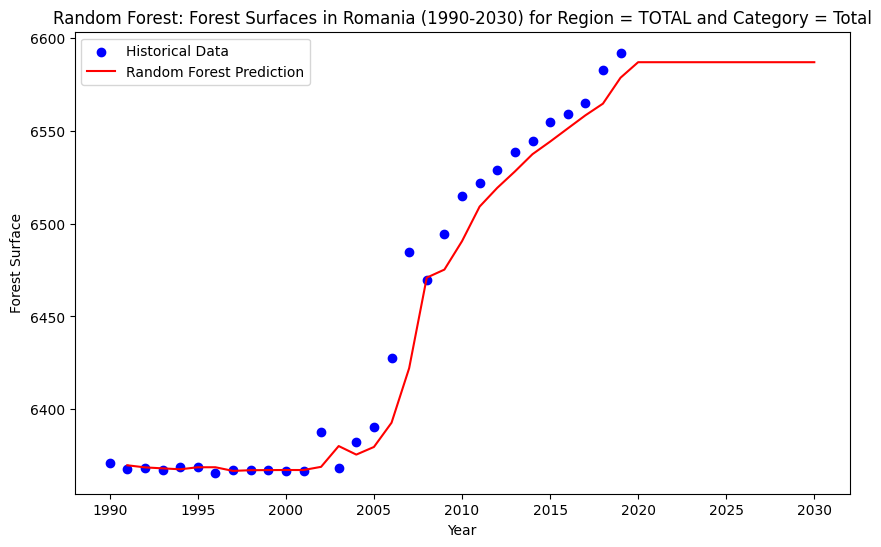

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
Judete = pd.read_csv('modified_dataset.csv')

# Ensure 'Year' is a datetime object
Judete['Year'] = pd.to_datetime(Judete['Year'], format='%Y')

# Filter the data for 'TOTAL' region and 'Total' category
filtered_data = Judete[(Judete['Region'] == 'TOTAL') & (Judete['Category'] == 'Total')]

# Aggregate data by year
filtered_data = filtered_data.groupby('Year')['Value'].sum().reset_index()

# Extracting year values as integers
X = filtered_data['Year'].dt.year.values.reshape(-1, 1)

# Extracting forest surface values
y = filtered_data['Value']

# Initialize and fit Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Predict forest surface for years from 1990 to 2030
years = pd.Series(pd.date_range(start='1990', end='2030', freq='YE'))
X_pred = years.dt.year.values.reshape(-1, 1)
y_pred = model.predict(X_pred)

# Calculate the difference between the predicted value for 2030 and the historical value for 1990
try:
    historical_value_1990 = filtered_data.loc[filtered_data['Year'].dt.year == 1990, 'Value'].iloc[0]
    difference = y_pred[-1] - historical_value_1990
    print(f"Difference between 2030 and 1990: {difference}")
except IndexError:
    print("Data for 1990 is not available.")

# Calculate MSE and MAE
y_true = filtered_data['Value']
y_pred_train = model.predict(X)

mse = mean_squared_error(y_true, y_pred_train)
mae = mean_absolute_error(y_true, y_pred_train)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Year'], filtered_data['Value'], color='blue', label='Historical Data')
plt.plot(years, y_pred, color='red', label='Random Forest Prediction')
plt.xlabel('Year')
plt.ylabel('Forest Surface')
plt.title('Random Forest: Forest Surfaces in Romania (1990-2030) for Region = TOTAL and Category = Total')
plt.legend()
plt.show()


            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
     group1          group2      meandiff p-adj    lower     upper   reject
---------------------------------------------------------------------------
           Alba            Arad       0.0    1.0   -4.5185    4.5185  False
           Alba           Arges   71.5667    0.0   67.0482   76.0851   True
           Alba           Bacau      62.9    0.0   58.3815   67.4185   True
           Alba           Bihor   -5.0333 0.0091   -9.5518   -0.5149   True
           Alba Bistrita-Nasaud  -14.9667    0.0  -19.4851  -10.4482   True
           Alba        Botosani -150.1667    0.0 -154.6851 -145.6482   True
           Alba          Braila    -179.9    0.0 -184.4185 -175.3815   True
           Alba          Brasov      -9.8    0.0  -14.3185   -5.2815   True
           Alba       Bucuresti -205.3667    0.0 -210.4976 -200.2357   True
           Alba           Buzau     -47.6    0.0  -52.1185  -43.0815   True
           A

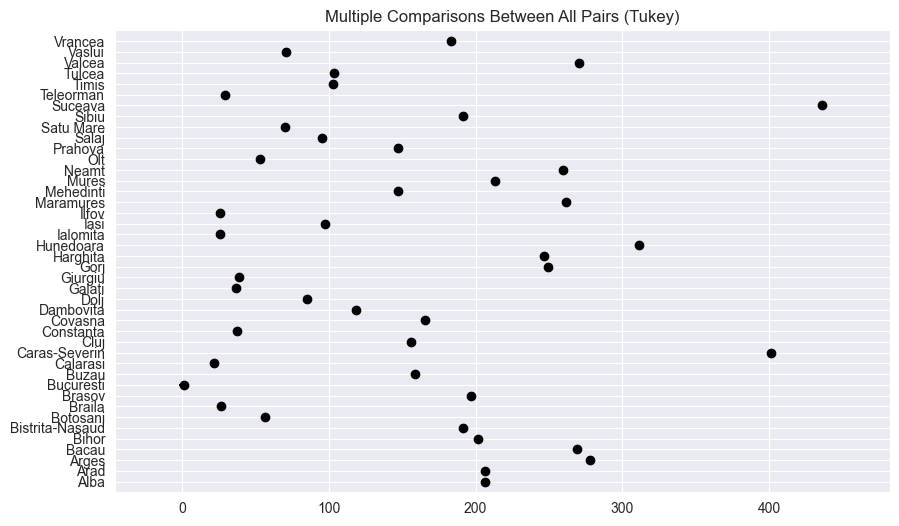

In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Creează un DataFrame pentru testul post-hoc
df = filtered_data[['Region', 'Value']]

# Realizează testul Tukey
tukey = pairwise_tukeyhsd(endog=df['Value'], groups=df['Region'], alpha=0.05)
print(tukey)

# Plotează rezultatele
tukey.plot_simultaneous()
plt.show()


### Random forest algorithm predictia pe perioada 2020-2030. Albastru - date reale, Linie rosie - valorile prezise

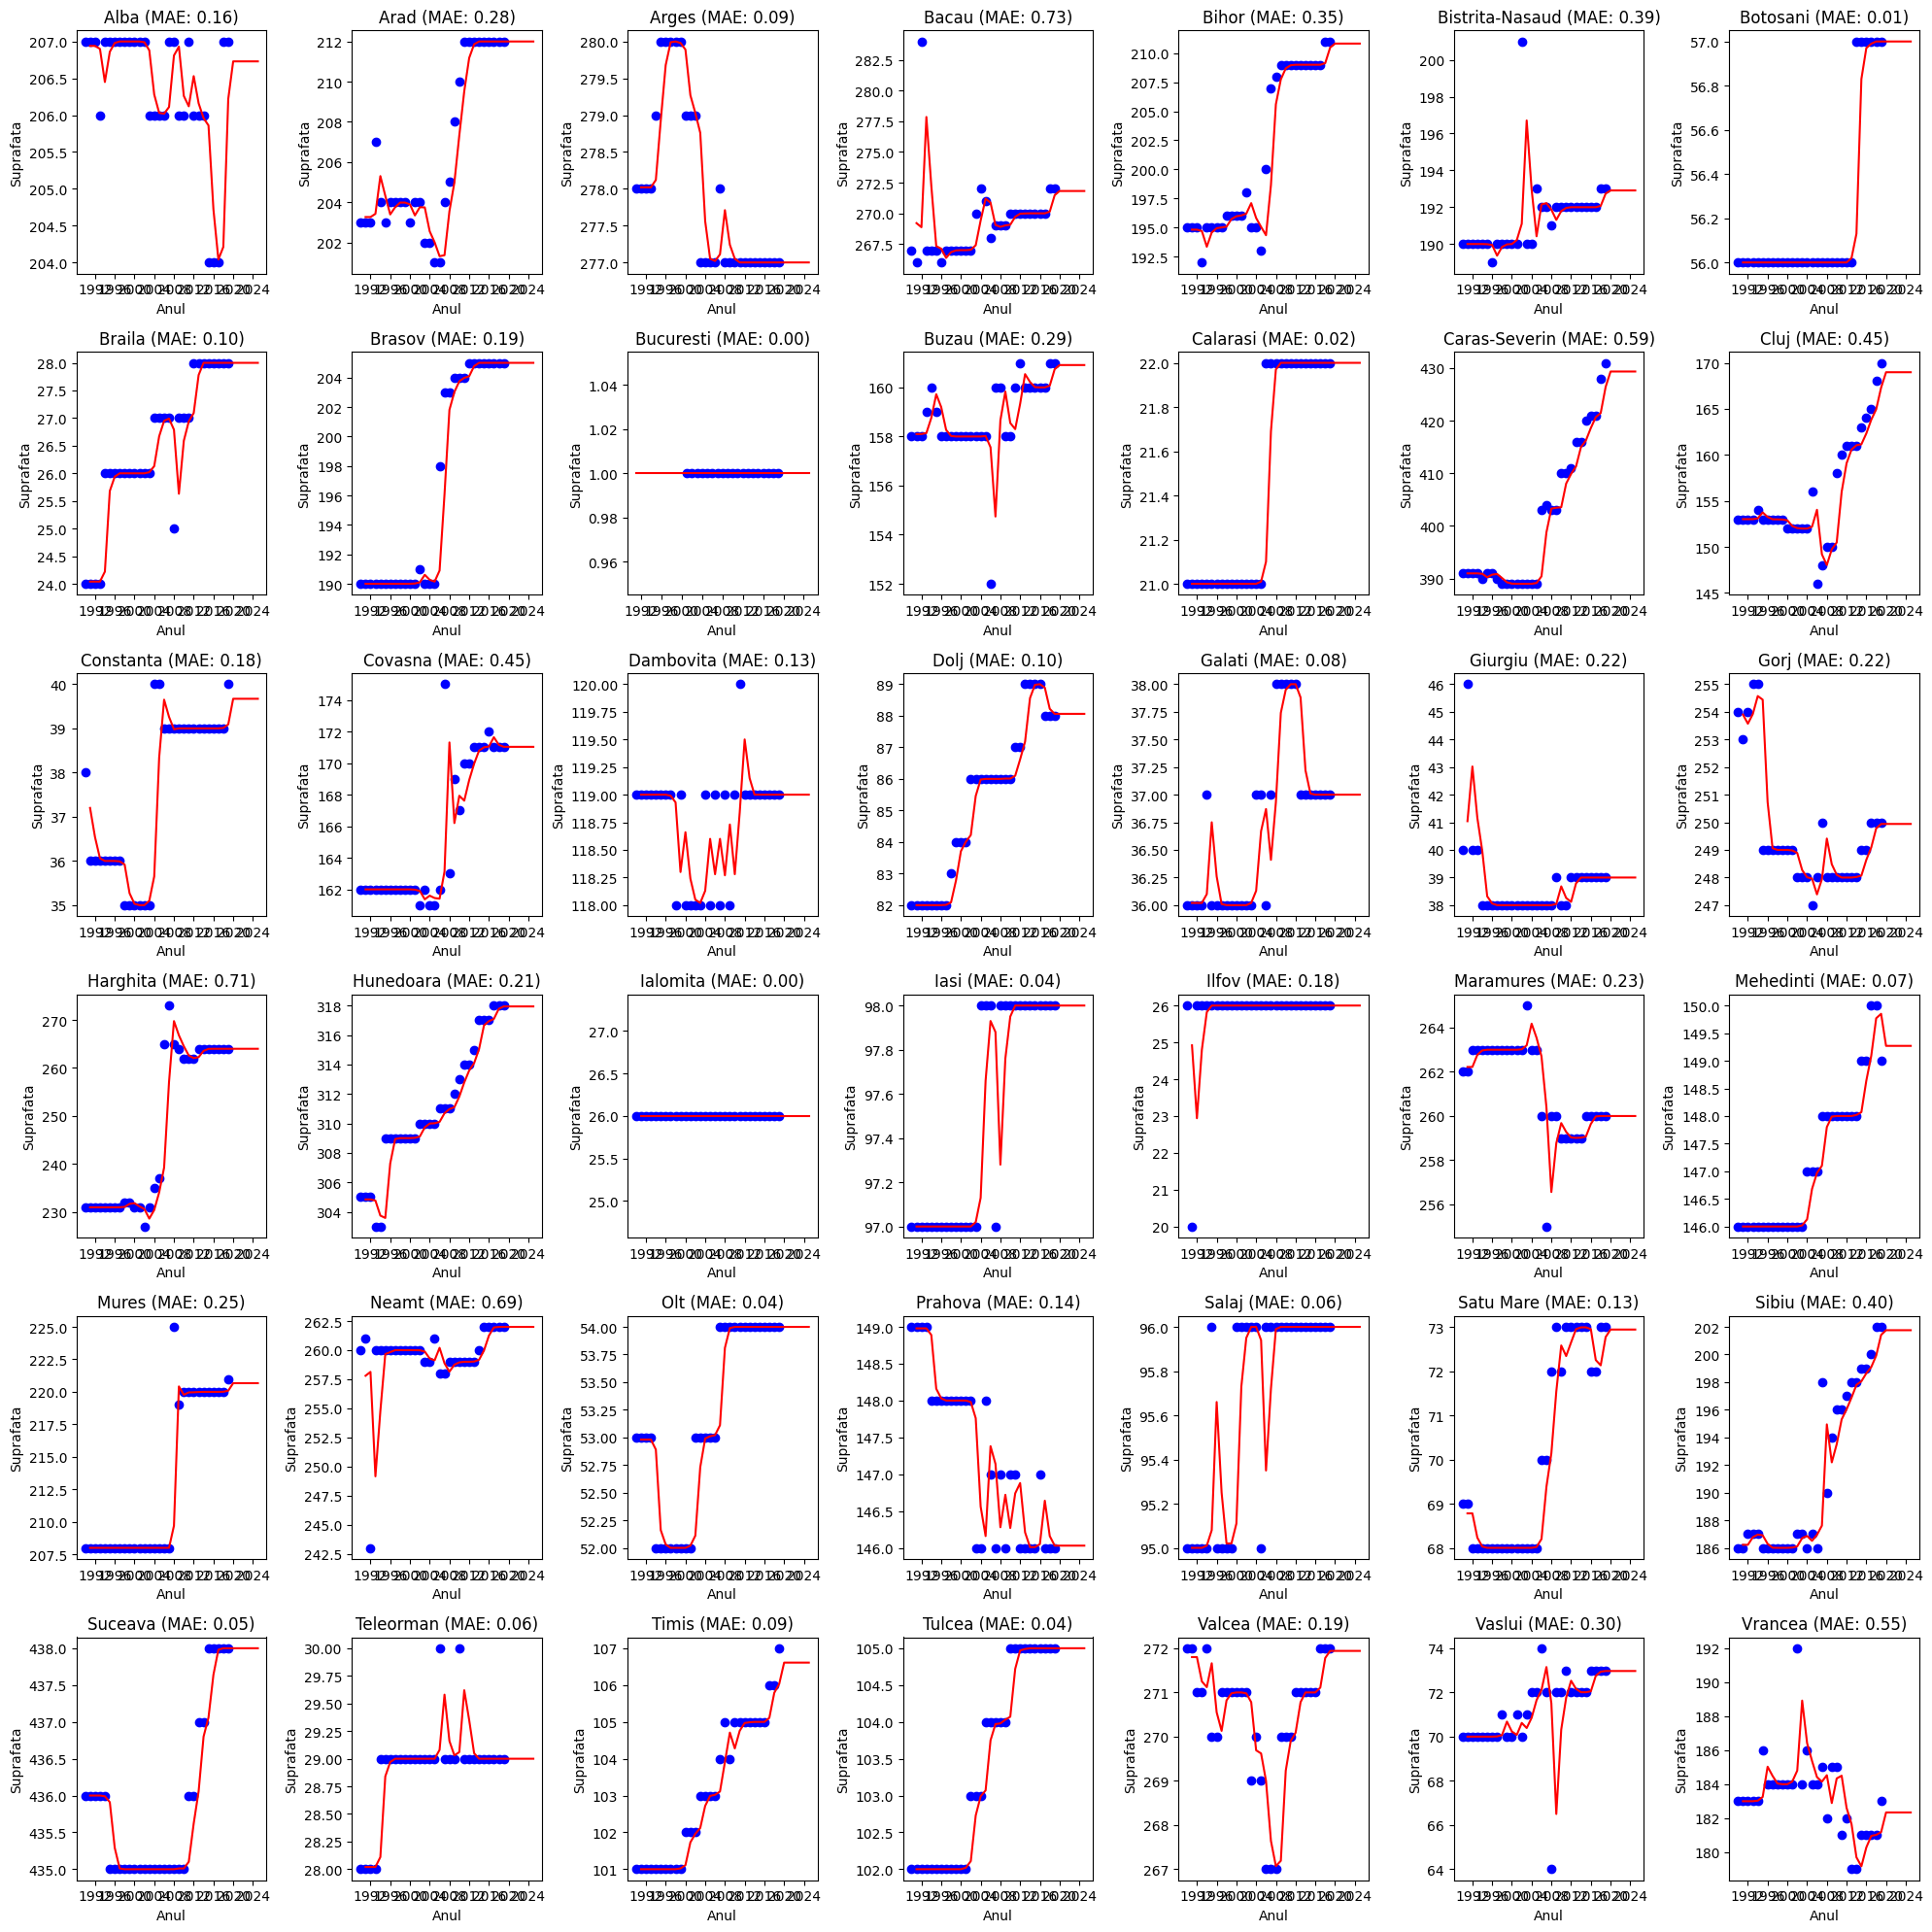

In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import math

# Load the dataset
Judete = pd.read_csv('Judete.csv')

# Ensure 'Year' is a datetime object
Judete['Year'] = pd.to_datetime(Judete['Year'], format='%Y')

# Filter the data for 'Total' category
filtered_data = Judete[Judete['Category'] == 'Total']

# List of unique regions in the dataset, sorted alphabetically
regions = sorted(filtered_data['Region'].unique())

# Calculate the number of rows and columns for subplots
num_plots = len(regions)
num_rows = math.ceil(num_plots / 7)  # Adjust the number of columns for your preference
num_cols = 7  # Number of columns for the grid layout

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each region and fit random forest regression model
for i, region in enumerate(regions):
    region_data = filtered_data[filtered_data['Region'] == region]

    # Aggregate data by year
    region_data = region_data.groupby('Year')['Value'].sum().reset_index()

    # Extracting year values as integers
    X = region_data['Year'].dt.year.values.reshape(-1, 1)

    # Extracting forest surface values
    y = region_data['Value']

    # Initialize and fit Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    # Predict forest surface for years from 1990 to 2025
    years = pd.Series(pd.date_range(start='1990', end='2025', freq='YE'))
    X_pred = years.dt.year.values.reshape(-1, 1)
    y_pred = model.predict(X_pred)

    # Calculate MAE for the model on the training data
    y_pred_train = model.predict(X)
    mae = mean_absolute_error(y, y_pred_train)

    # Plot the results for each region
    ax = axes[i]
    ax.scatter(region_data['Year'], region_data['Value'], color='blue')
    ax.plot(years, y_pred, color='red')
    ax.set_xlabel('Anul')
    ax.set_ylabel('Suprafata')
    ax.set_title(f"{region} (MAE: {mae:.2f})")

# Hide any empty subplots
for i in range(num_plots, num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()
